In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

image_path = 'C:/Users/ashwi/Desktop/CMU/FALL_2024/Modern_Control_Theory/Homework/MCT_HW3/CMU_Grayscale.png'
image = Image.open(image_path)
image_matrix = np.array(image)
# print(image_matrix)
# print(np.shape(image_matrix))
m,n = np.shape(image_matrix)
U, E, V = np.linalg.svd(image_matrix)
#E = np.reshape(E,(-1,1))
print(np.shape(U))
print(np.shape(E))
print(np.shape(V))

(675, 675)
(675,)
(1200, 1200)


In [22]:
#Defining some useful functions

def findi(ratio, m, n):
    i = int(ratio*m*n/(m+n+1))
    print(i)
    return i

def gen_image(U, E, V, i):
    E = np.diag(E[:i])
    im = U[:, 0:i] @ E[0:i] @ V[0:i, :]
    return im

In [23]:
i_50 = findi(0.5, m, n)
i_10 = findi(0.1, m, n)
i_05 = findi(0.05, m, n)

i_50_image = gen_image(U,E,V,i_50)
i_10_image = gen_image(U,E,V,i_10)
i_05_image = gen_image(U,E,V,i_05)

215
43
21


In [24]:
def save_image(image, compression_level, title, output_path):
    output_filename = f'compressed_{compression_level}.png'
    output_path_final = os.path.join(output_path, output_filename)
    
    plt.imshow(image,cmap='gray')
    plt.title(f"{title}")
    plt.axis('off')
    plt.savefig(output_path_final)
    plt.show()   
    
    # if os.path.exists(output_path_final):
    #     print(f"Image successfully saved at: {output_path_final}")
    # else:
    #     print("Failed to save the image.")

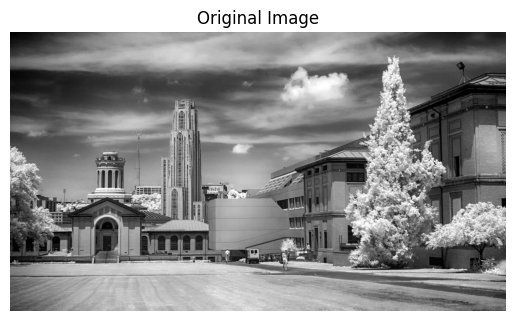

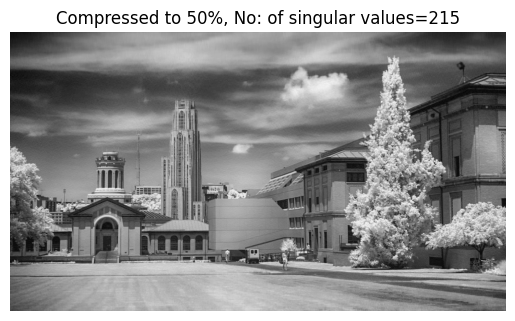

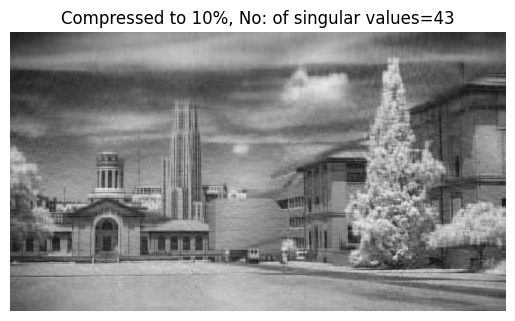

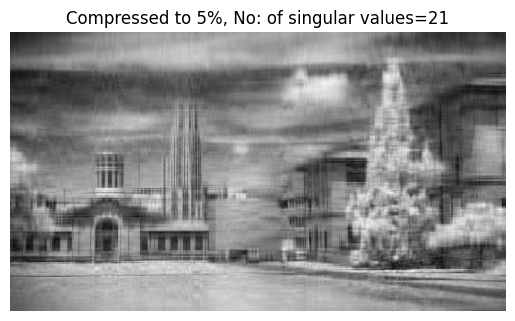

In [25]:
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()  

save_image(i_50_image, 50, f"Compressed to 50%, No: of singular values={i_50}", "C:/Users/ashwi/Desktop/CMU/FALL_2024/Modern_Control_Theory/Homework/MCT_HW3/Compressed_Images")
save_image(i_10_image, 10, f"Compressed to 10%, No: of singular values={i_10}", "C:/Users/ashwi/Desktop/CMU/FALL_2024/Modern_Control_Theory/Homework/MCT_HW3/Compressed_Images")
save_image(i_05_image, 5,f"Compressed to 5%, No: of singular values={i_05}", "C:/Users/ashwi/Desktop/CMU/FALL_2024/Modern_Control_Theory/Homework/MCT_HW3/Compressed_Images")
